<a href="https://colab.research.google.com/github/ohyunju/projects/blob/ohyunju-patch-1/project1/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1일차

---



 ## 프로젝트에 꼭 포함되야 하는 내용
1. 지역에 따라서 선호하는 게임 장르가 다를까
2. 연도별 게임의 트렌드가 있을까
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스


---



## 학습 계획
* 1일차 : EDA(데이터 전처리) 및 데이터를 가지고 할 수 있는 계획 수립
* 2일차 : Hypothesis Test, CI, Bayesian, DR, PCA, Cluster 및 시각화
* 3일차 : Hypothesis Test, CI, Bayesian, DR, PCA, Cluster 및 시각화
* 4일차 : 스크립트 제작 및 영상물 촬영


---



In [1]:
import pandas as pd

url='https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
df = pd.read_csv(url)

# Unnamed: 0 는 단순 인덱스넘버이므로 삭제
df = df.drop('Unnamed: 0', axis = 1) 
df.isnull().sum()
# 'Year' 271 / 'Genre' 50 / 'Publisher' 58 의 널값 존재, 결측치 드랍
df_man=df.dropna()
# 칼럼명 'Name','Platform','Year','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales' 

print(df_man.info())
df_man.head() #(16241 rows × 9 columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB
None


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


## 계획 수립
1. 지역에 따라서 선호하는 게임 장르가 다를까 
> **파이그래프**로 각 지역에 따른 분포를 보여주기, 4개의 지역에 따른 선호 장르를 차이를 따지기 위해 **ANOVA**사용 
2. 연도별 게임의 트렌드가 있을까 (게임의 트렌드라는 말을 장르로 인식) 
> 4가지의 Sales 칼럼을 모두 모은 Total_Sales 칼럼을 만들어, *x=출시연도 & y=Total_Sales & hue=장르*로 **선그래프**로시각화, 연도와 토탈세일에 대한 차이가 있는지 확인하기 위해 **T-test** 나 **chi-square-test**, **chi2_contingency**사용
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스 
> 위에서 만든 Total_Sales 라는 칼럼을 이용, **누적그래프**를 이용해서 출고량이 제일 많다는 것 보여주기, 출고량 상위 30가지 항목이용
4. 연도별 플랫폼에도 트렌드가 있을까 
> 4가지의 Sales 칼럼을 모두 모은 Total_Sales 칼럼을 만들어, *x=출시연도 & y=Total_Sales & hue=플랫폼*으로 **선그래프**로시각화, 연도와 토탈세일에 대한 차이가 있는지 확인하기 위해 **T-test** 나 **chi-square-test**, **chi2_contingency**사용
5. 제일 선호되는 회사와 지역에 따라서 선호하는 회사가 다를까 
> 전체적으로 랭킹 상위30 (575개의 회사), **파이그래프**로 각 지역에 따른 분포를 보여주기, 4개의 지역에 따른 회사 선호 장르를 차이를 따지기 위해 **ANOVA**사용(자국의 회사를 선호하는지?, 자국인지는 구글링 해보기)
6. 출시이후 평균 판매량은 어떤지 확인하기, 전체적으로도, 지역별로 그룹해서도, 또한 순위 재평가(상위 30개 게임)
> 출시이후 평균 판매량=총판매량/(지금년도-출시년도+1) 라는 수식을 사용(지금의 판매량은 누적이기 때문에 늦게 출시된 제품의 판매량이 떨어질 수 밖에 없다고 판단), 꾸준히 인기가 있는 게임이 있다면 원인은 무엇일까?

# + DR, PCA, Cluster 를 활용할 수 있는 방안 생각하기

### 결과 
이러한 분석들을 통해 전세계를 대상으로한 게임을 출시하려고 한다면 
  * 지역에 따라 게임의 장르, 플랫폼을 다르게 설정해야 하는지
  * 지금 트렌드의 장르로 개발하는 것이 맞는지 (연도별 장르의 추세를 보여줄 수 있는 선 그래프 활용, 약 40년의 기간을 5년의 기간으로 쪼개고 그동안의 장르(12개중 상위 3개씩) 변동 보여주는데 바 그래프 이용)
  * 위 질문에 대한 타탕성의 결과 어떤 게임을 출시해야 한다.


In [ ]:
header=['Platform','Year','Genre','Publisher']
for i in header:
  df_check=df_man[i]
  df_check=df_check.drop_duplicates()
  print('길이',len(df_check))
  print(df_check)

# 플랫폼에 숫자(2600)가 있길래 잘못 입력인줄 알았는데 구글에 확인하니 이런 플랫폼이 존재 (아타리2600)
# 연도에 이상한 값 있음

In [3]:
#'Year' 칼럼 100초과로 잡아줌
df1=df_man[df_man.Year >100]
df1.describe()
df1 #(16141 rows × 9 columns)

df1[10:20]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
11,Harvest Moon: More Friends of Mineral Town,GBA,2003.0,Simulation,Ubisoft,0.14,0.05,0,0
12,Mount & Blade,PC,2008.0,Role-Playing,Paradox Interactive,0,0.02,0,0
13,The Professor's Brain Trainer: Logic,DS,2005.0,Puzzle,505 Games,0.02,0,0,0
14,Zoids Dash,DS,2006.0,Role-Playing,Tomy Corporation,0,0,0.02,0
15,Mini Ninjas,PS3,2009.0,Action,Eidos Interactive,0.14,0.16,0,0.06
16,Rise of Nations,PC,2003.0,Strategy,Microsoft Game Studios,0.01,0.02,0,0.01
17,Hajime no Ippo: The Fighting! (2014),PS3,2014.0,Sports,Namco Bandai Games,0,0,0.03,0
18,Grand Kingdom,PS4,2015.0,Role-Playing,Nippon Ichi Software,0.02,0,0.03,0
19,Tropico Reloaded,PC,2009.0,Strategy,Kalypso Media,0,0.02,0,0


In [4]:
# Sales 값 들에 대한 데이터 전처리 (K,M)
Sales=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
df2=df1
print(len(df2)) 
print(len(df)) 

16141
16598


In [6]:
#시간 줄이는 간단한 방법이 없을까....ㅠㅠ
#인덱스 넘버는 0-16597(갯수는 16141) 개라 시간이 많이 소요****주의(내 컴기준 거의 5분)

for i in Sales:
  df2[i]=df2[i].str.replace('M','')
  for j in range(0,len(df)):
    try:
      if df2[i].str.contains('K')[j]:
        df2[i][j]=df2[i][j].replace('K','')
        df2[i][j]=pd.to_numeric(df2[i][j])*0.001   
    except:
      continue

df2[10:20] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(co

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,0.48,0.33,0,0.06
11,Harvest Moon: More Friends of Mineral Town,GBA,2003.0,Simulation,Ubisoft,0.14,0.05,0,0
12,Mount & Blade,PC,2008.0,Role-Playing,Paradox Interactive,0,0.02,0,0
13,The Professor's Brain Trainer: Logic,DS,2005.0,Puzzle,505 Games,0.02,0,0,0
14,Zoids Dash,DS,2006.0,Role-Playing,Tomy Corporation,0,0,0.02,0
15,Mini Ninjas,PS3,2009.0,Action,Eidos Interactive,0.14,0.16,0,0.06
16,Rise of Nations,PC,2003.0,Strategy,Microsoft Game Studios,0.01,0.02,0,0.01
17,Hajime no Ippo: The Fighting! (2014),PS3,2014.0,Sports,Namco Bandai Games,0,0,0.03,0
18,Grand Kingdom,PS4,2015.0,Role-Playing,Nippon Ichi Software,0.02,0,0.03,0
19,Tropico Reloaded,PC,2009.0,Strategy,Kalypso Media,0,0.02,0,0


In [ ]:
#df2['NA_Sales'].str.endswith('K')[10]  #True
#df2['NA_Sales'][10]=pd.to_numeric(df2['NA_Sales'][10].replace('K',''))*0.001 
#df2['NA_Sales'][10]=df2['NA_Sales'][10].replace('K','')
#df2['NA_Sales'][10]
#df2['NA_Sales'][10]=pd.to_numeric(df2['NA_Sales'][10])*0.001
#df2['NA_Sales'][10]

#df2['NA_Sales'].str.contains('K')[45] #True

df2[85:94]

In [11]:
df2['Year'] = df2['Year'].astype(int)

for i in Sales:
  df2[i] = df2[i].astype(float)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16141 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16141 non-null  object 
 1   Platform     16141 non-null  object 
 2   Year         16141 non-null  int64  
 3   Genre        16141 non-null  object 
 4   Publisher    16141 non-null  object 
 5   NA_Sales     16141 non-null  float64
 6   EU_Sales     16141 non-null  float64
 7   JP_Sales     16141 non-null  float64
 8   Other_Sales  16141 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.9+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# 2일차

---



In [13]:
df2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


#### 지역에 따라서 선호하는 게임 장르가 다를까 
> **파이그래프**로 각 지역에 따른 분포를 보여주기, 4개의 지역에 따른 선호 장르를 차이를 따지기 위해 **ANOVA**사용

In [45]:
import pandas as pd
import numpy as np

#장르에 대한 선호도(판매량에 대한 가중치를 줘서)를 보여주기 위해 크로스탭을 한후 곱해줌
obs_NA = pd.crosstab(df2['Genre'], df2['NA_Sales'])
column=obs_NA.columns
index=obs_NA.index
obs2_NA=np.dot(np.array(obs_NA),np.array(column))
obs_region=pd.DataFrame(data=obs2_NA)
obs_region.columns=['NA_Sales']

obs_EU = pd.crosstab(df2['Genre'], df2['EU_Sales'])
column=obs_EU.columns
obs2_EU=np.dot(np.array(obs_EU),np.array(column))
obs_region['EU_Sales']=obs2_EU

obs_JP = pd.crosstab(df2['Genre'], df2['JP_Sales'])
column=obs_JP.columns
obs2_JP=np.dot(np.array(obs_JP),np.array(column))
obs_region['JP_Sales']=obs2_JP

obs_Other = pd.crosstab(df2['Genre'], df2['Other_Sales'])
column=obs_Other.columns
obs2_Other=np.dot(np.array(obs_Other),np.array(column))
obs_region['Other_Sales']=obs2_Other
obs_region['Genre']=index

obs_region

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Genre
0,855.96,512.52,155.73,183.64,Action
1,101.33,63.32,51.79,16.64,Adventure
2,220.11,99.72,86.39,36.10,Fighting
3,394.29,207.68,103.71,72.54,Misc
4,442.46,199.40,129.22,51.15,Platform
5,121.00,50.39,56.19,12.39,Puzzle
6,353.57,234.20,55.42,76.23,Racing
7,307.08,176.31,336.25,54.71,Role-Playing
8,570.89,307.26,37.34,100.82,Shooter
9,181.04,112.68,63.46,31.24,Simulation


In [59]:
#ANOVA
import scipy.stats as stats

F_statistic, pVal = stats.f_oneway(obs_region['NA_Sales'], obs_region['EU_Sales'], obs_region['JP_Sales'], obs_region['Other_Sales'])
print('데이터의 일원분산분석 결과 : F={0:.3f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

데이터의 일원분산분석 결과 : F=9.033, p=0.00009
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


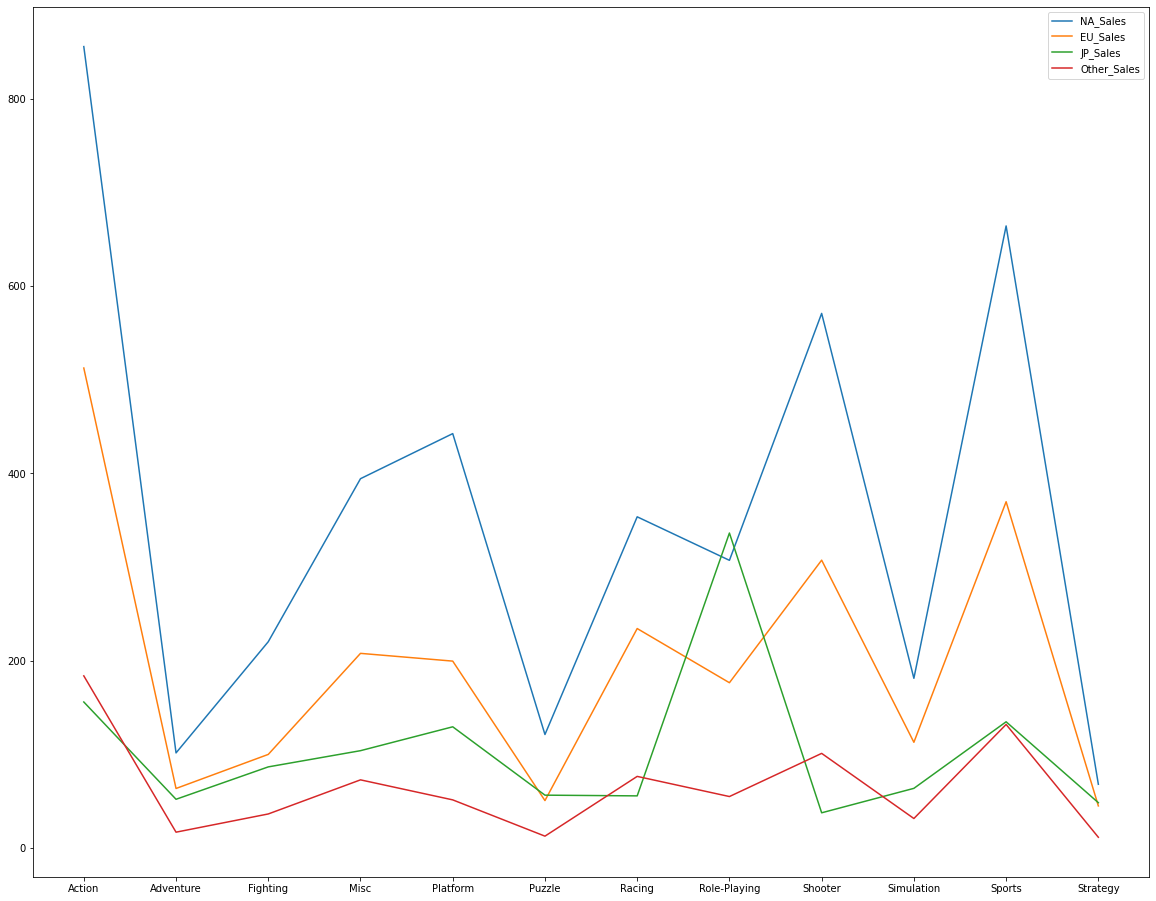

In [70]:
#선 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
plt.plot(obs_region['Genre'],obs_region['NA_Sales'])
plt.plot(obs_region['Genre'],obs_region['EU_Sales'])
plt.plot(obs_region['Genre'],obs_region['JP_Sales'])
plt.plot(obs_region['Genre'],obs_region['Other_Sales'])
plt.legend(Sales)
plt.show()

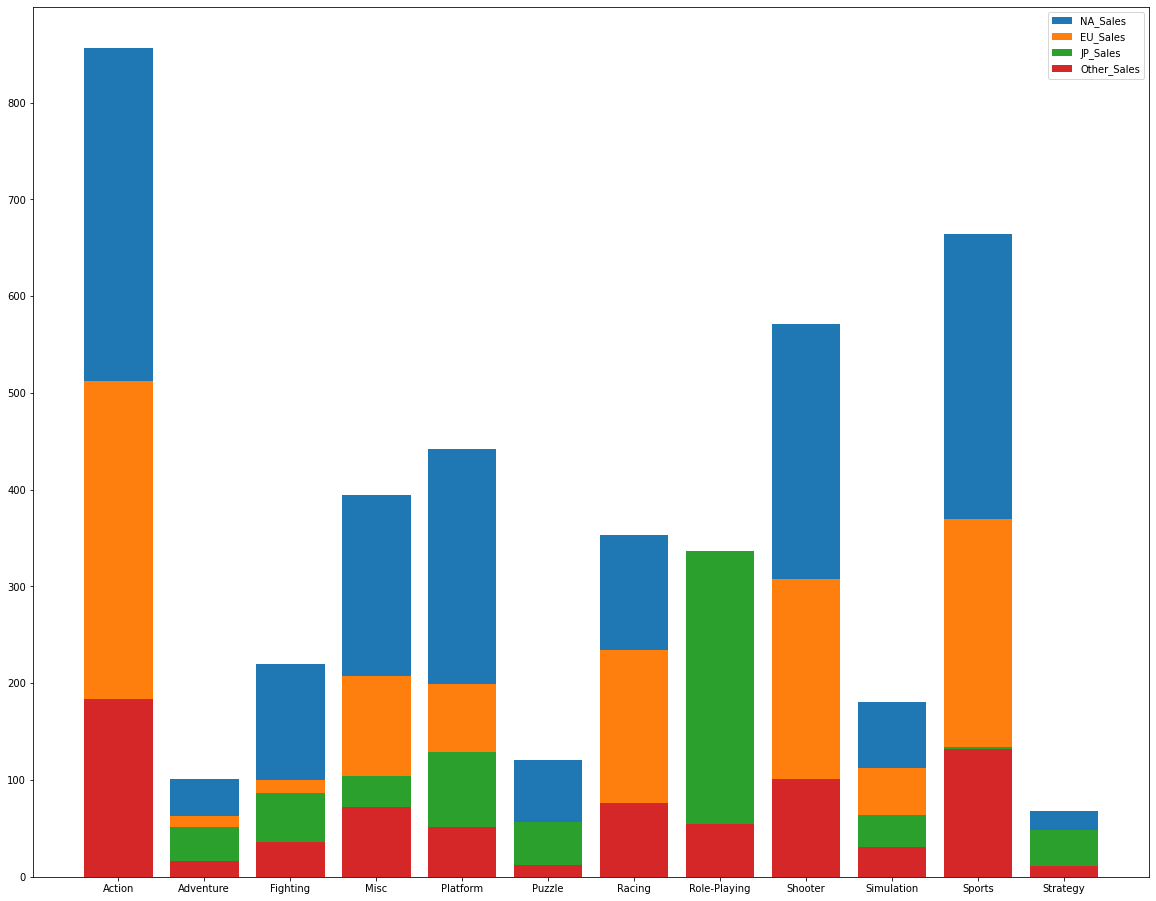

In [71]:
#바 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
plt.bar(obs_region['Genre'],obs_region['NA_Sales'])
plt.bar(obs_region['Genre'],obs_region['EU_Sales'])
plt.bar(obs_region['Genre'],obs_region['JP_Sales'])
plt.bar(obs_region['Genre'],obs_region['Other_Sales'])
plt.legend(Sales)
plt.show()

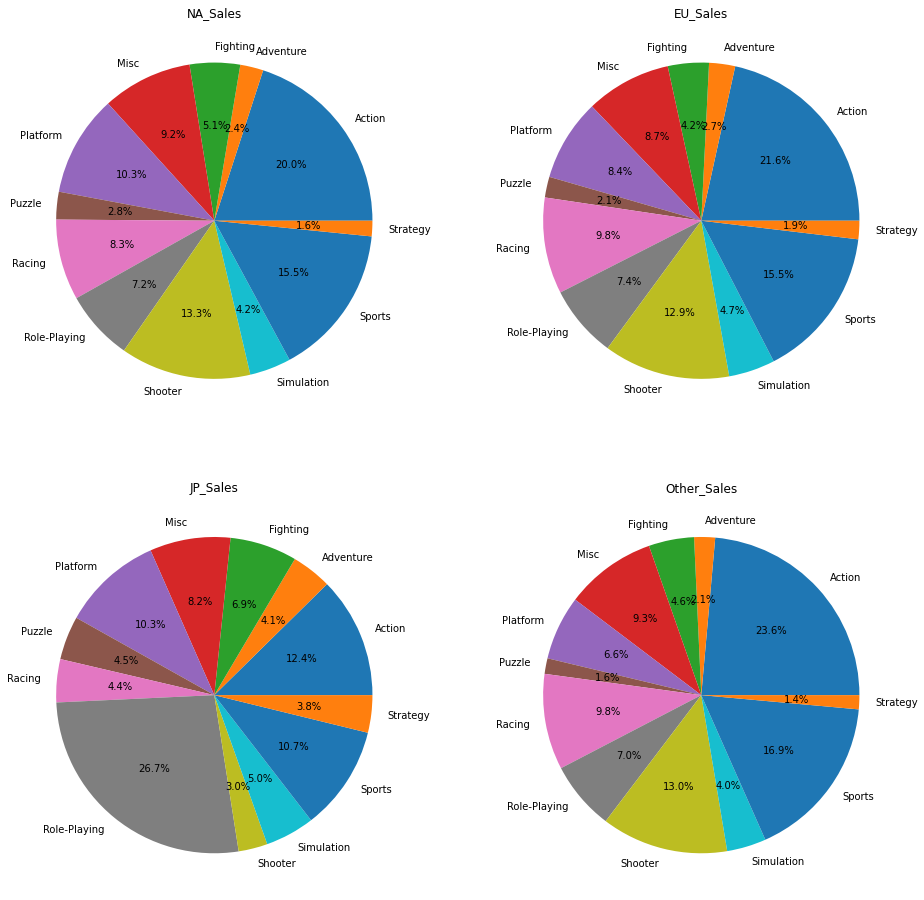

In [60]:
#파이 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
plt.subplot(221)
plt.title('NA_Sales')
plt.pie(obs_region['NA_Sales'], labels=obs_region['Genre'], autopct='%.1f%%')
 
plt.subplot(222)
plt.title('EU_Sales')
plt.pie(obs_region['EU_Sales'], labels=obs_region['Genre'], autopct='%.1f%%')
 
plt.subplot(223)
plt.title('JP_Sales')
plt.pie(obs_region['JP_Sales'], labels=obs_region['Genre'], autopct='%.1f%%')
 
plt.subplot(224)
plt.title('Other_Sales')
plt.pie(obs_region['Other_Sales'], labels=obs_region['Genre'], autopct='%.1f%%')

plt.show()

#### 연도별 게임의 트렌드가 있을까 (게임의 트렌드라는 말을 장르로 인식) 
> 4가지의 Sales 칼럼을 모두 모은 Total_Sales 칼럼을 만들어, *x=출시연도 & y=Total_Sales & hue=장르*로 **선그래프**로시각화, 연도와 토탈세일에 대한 차이가 있는지 확인하기 위해 **T-test** 나 **chi-square-test**, **chi2_contingency**사용


#### 출고량이 높은 게임에 대한 분석 및 시각화 프로세스 
> 위에서 만든 Total_Sales 라는 칼럼을 이용, **누적그래프**를 이용해서 출고량이 제일 많다는 것 보여주기, 출고량 상위 30가지 항목이용


#### 연도별 플랫폼에도 트렌드가 있을까 
> 4가지의 Sales 칼럼을 모두 모은 Total_Sales 칼럼을 만들어, *x=출시연도 & y=Total_Sales & hue=플랫폼*으로 **선그래프**로시각화, 연도와 토탈세일에 대한 차이가 있는지 확인하기 위해 **T-test** 나 **chi-square-test**, **chi2_contingency**사용


#### 제일 선호되는 회사와 지역에 따라서 선호하는 회사가 다를까 
> 전체적으로 랭킹 상위30 (575개의 회사), **파이그래프**로 각 지역에 따른 분포를 보여주기, 4개의 지역에 따른 회사 선호 장르를 차이를 따지기 위해 **ANOVA**사용(자국의 회사를 선호하는지?, 자국인지는 구글링 해보기)


#### 출시이후 평균 판매량은 어떤지 확인하기, 전체적으로도, 지역별로 그룹해서도, 또한 순위 재평가(상위 30개 게임)
> 출시이후 평균 판매량=총판매량/(지금년도-출시년도+1) 라는 수식을 사용(지금의 판매량은 누적이기 때문에 늦게 출시된 제품의 판매량이 떨어질 수 밖에 없다고 판단), 꾸준히 인기가 있는 게임이 있다면 원인은 무엇일까?